# **LIST KETERANGAN**
**A.   Mengimport libraries**

**B.   Mengatur dataset**

**C.   Data Preprocessing/Cleaning**

**D.   Model Regresi Linear**

**E.   Plotting**


# **A. Mengimport libraries**

**Mengimport library yang dibutuhkan.**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **B. Mengatur dataset**

**B.1 Mengimport dataset.**

In [5]:
# Google Drive
ds = pd.read_csv("score.csv")

# File
# ds = pd.read_csv("score.csv")

**B.2 Memastikan dataset sudah terimpor dengan benar.**

In [6]:
print(ds)

    Hours  Scores
0     2.5    21.0
1     5.1    47.0
2     3.2    27.0
3     8.5    75.0
4     3.5    30.0
..    ...     ...
93    6.1     NaN
94    3.7    37.0
95    8.0    84.0
96    7.3   820.0
97    1.2   -12.0

[98 rows x 2 columns]


# **C. Data Preprocessing/Cleaning**

**C.1 Memperiksa dan menghitung data yang kosong didalam dataset.**

In [7]:
ds.isna().sum()

Hours     0
Scores    6
dtype: int64

**C.2.1 Mengisi data yang kosong dengan menghitung mean dari kolom "Scores".**


---


***(Pilih salah satu)***

In [8]:
ds['Scores'] = ds['Scores'].fillna(ds['Scores'].mean())

**C.2.2 Menghapus data yang kosong pada dataset.**


---

***(Pilih salah satu)***

In [9]:
ds = ds.dropna()

**C.3 Memastikan tidak ada data kosong yang tersisa.**

In [10]:
ds.isna().sum()

Hours     0
Scores    0
dtype: int64

**C.4 Memperiksakan dan menghitung jumlah data yang terduplikat.**

In [11]:
print("Duplicated data :", ds.duplicated().sum())

Duplicated data : 1


**C.5 Menghapus data yang terduplikat.**

In [12]:
ds = ds.drop_duplicates()

print("Duplicated data :", ds.duplicated().sum())

Duplicated data : 0


**C.6 Memeriksa keanehan atau anomali pada data.**

In [13]:
ds.describe()

,Hours,Scores
count,97.000000,97.000000
mean,5.201031,60.577544
std,2.612689,81.798426
min,0.000000,-12.000000
25%,3.000000,30.000000
50%,5.300000,56.000000
75%,7.300000,72.000000
max,9.800000,820.000000


**C.7 Menghilangkan outliers atau data yang anomali.**

In [14]:
ds = ds[(ds['Scores'] >= 0) & (ds['Scores'] <= 100) & (ds['Hours'] > 0)]
ds.describe()

,Hours,Scores
count,93.000000,93.000000
mean,5.333333,53.742169
std,2.509042,24.294113
min,1.000000,12.000000
25%,3.100000,31.000000
50%,5.400000,57.000000
75%,7.400000,72.000000
max,9.800000,99.000000


# **D. Model Linear Regression**

**D.1 Menentukan variabel Independen (X) dan Dependen (Y)**

In [15]:
x = np.array(ds['Hours'])
y = np.array(ds['Scores'])

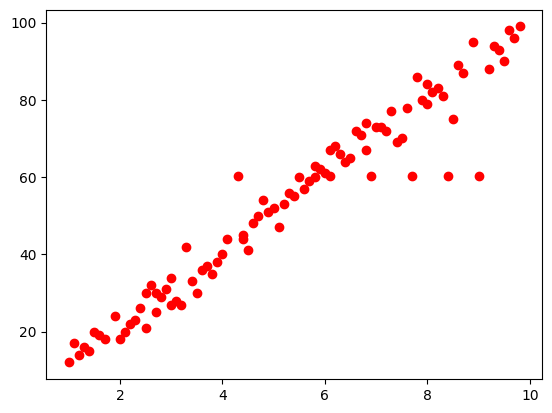

In [16]:
plt.scatter(x, y, color="red")
plt.show()

**D.2 Menghitung jumlah dari setiap kolom yang ada didataset.**

In [17]:
countx = len(x)
county = len(y)

print(countx)
print(county)

93
93


**D.3 Menghitung rata-rata dari setiap kolom yang ada di dataset.**

In [18]:
meanx = np.mean(x)
meany = np.mean(y)

print("Nilai rata rata X adalah:", meanx)
print("Nilai rata rata Y adalah:",meany)

Nilai rata rata X adalah: 5.333333333333333
Nilai rata rata Y adalah: 53.74216923796167


**D.4 Mencari kovarian dan varian.**

In [19]:
sxy = np.sum(x * y) - countx * meanx * meany
sxx = np.sum(x * x) - countx * meanx**2

print("Kovarians nya adalah:", sxy)
print("Varians nya adalah:",sxx)

Kovarians nya adalah: 5451.4710144927485
Varians nya adalah: 579.166666666667


**D.5 Mencari koefisien dan menemukan Slope (b1) dan Intercept (b0).**





In [20]:
b1 = sxy / sxx
b0 = meany - b1 * meanx

print(b1)
print(b0)

9.412611823584596
3.541572845510494


**D.6 Mencari prediksi dari nilai Y.**

In [21]:
predy = b1 * x + b0

print(predy)

[27.0731024  51.54589315 33.66193068 83.54877335 36.48571423 17.66049058
 90.13760162 55.31093788 81.66625098 28.95562477 76.01868389 59.0759826
 45.89832605 34.60319186 13.89544585 87.31381808 27.0731024  21.42553531
 60.95850497 73.19490034 28.95562477 48.7221096  39.30949778 68.48859443
 76.95994507 92.96138517 58.13472142 25.19058004 47.78084842 18.60175176
 88.25507926 61.89976615 79.78372862 40.25075896 24.24931886 70.37111679
 62.84102733 53.42841551 44.95706487 92.02012399 66.60607206 38.36823659
 72.25363916 42.13328132 78.84246743 32.7206695  15.77796822 57.19346024
 29.89688595 77.90120625 65.66481088 37.42697541 26.13184122 46.83958723
 82.60751216 19.54301295 52.48715433 63.78228852 75.0774227  91.0788628
 35.54445305 23.30805768 54.36967669 80.7249898  16.7192294  93.90264635
 67.54733325 74.13616152 44.01580369 64.7235497  85.43129571 31.77940832
 30.83814713 14.83670703 94.84390753 49.66337078 56.25219906 84.49003453
 28.01436359 71.31237798 12.95418467 60.01724379 41.1

# **E. Plotting**

**E. Melakukan plotting dari nilai yang sudah didapatkan.**

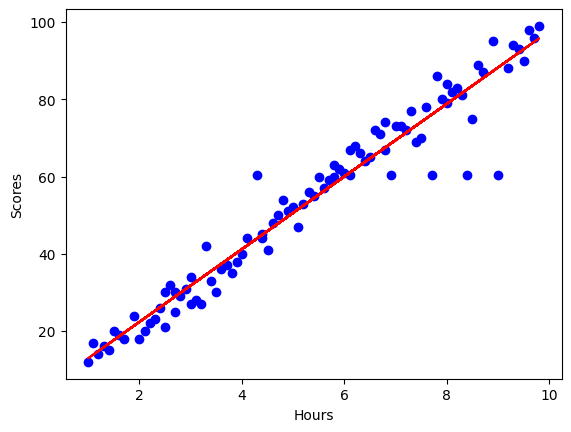

In [22]:
plt.scatter(x,y,color="b")
plt.plot(x,predy,color="r")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

# **F. Evaluasi**

**F. Melakukan evaluasi model menggunakan R Squared**

In [23]:
error = y - predy
se = np.sum(error**2)

sst = np.sum((y - meany)**2)
r2 = 1-(se/sst)

print("The R Squared value is:", r2)

The R Squared value is: 0.9450046509360898


In [24]:
def kalkulasiWaktuBelajar(nilai):
  return (nilai - b0) / b1

kalkulasiWaktuBelajar(80)

np.float64(8.122976766439297)